In [ ]:
!pip install datasets

**<h3>Importing Libraries and Performing Basic Cleaning</h3>**

In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

**<h3>Filtering for Data Analysts in India</h3>**

In [3]:
df_da_india = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()

In [7]:
df_da_india = df_da_india.dropna(subset='salary_year_avg')
df_daexp = df_da_india.explode('job_skills')
df_daexp[['salary_year_avg' , 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


**<h3>Calculate Percent of Job Postings that Have Skills</h3>**

**<h5>Median Salary vs Skills</h5>**

In [26]:
da_skills  = df_daexp.groupby('job_skills')['salary_year_avg'].agg(['count' , 'median']).sort_values(by='count',ascending=False)
da_count = len(df_da_india)
da_skills['skills_percentage'] = da_skills['count']/da_count *100
da_skills = da_skills.head(10)
da_skills

,count,median,skills_percentage
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
power bi,17,111175.0,18.085106
azure,15,93600.0,15.957447
aws,12,79200.0,12.765957
oracle,11,79200.0,11.702128


**<h3>Plotting of Graph</h3>**

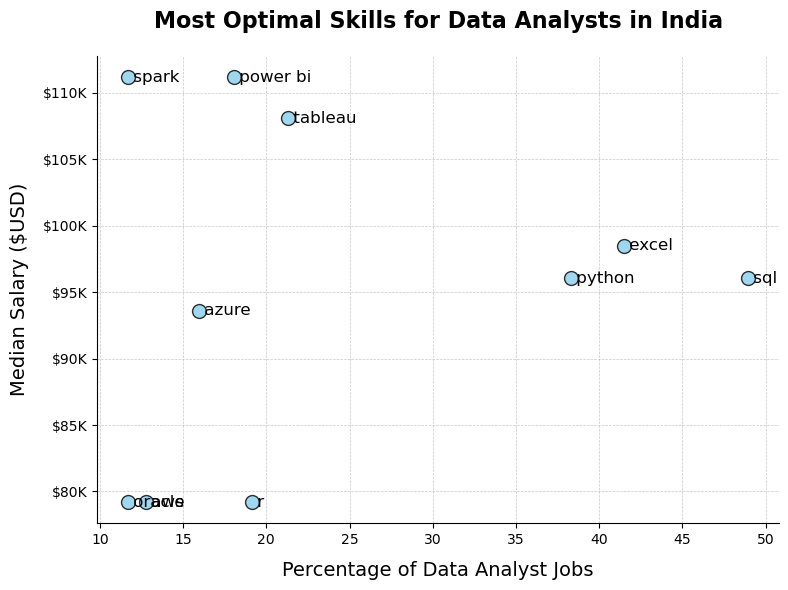

In [28]:

import matplotlib.pyplot as plt

# Assuming da_skills is defined and contains the data

# Create scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(da_skills['skills_percentage'], da_skills['median'], s=100, c='skyblue', alpha=0.8, edgecolor='black')

# Set labels and title
plt.xlabel('Percentage of Data Analyst Jobs', fontsize=14, labelpad=10)
plt.ylabel('Median Salary ($USD)', fontsize=14, labelpad=10)
plt.title('Most Optimal Skills for Data Analysts in India', fontsize=16, fontweight='bold', pad=20)

# Format y-axis to show in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# Add labels to points
for i, txt in enumerate(da_skills.index):
    plt.text(da_skills['skills_percentage'].iloc[i], da_skills['median'].iloc[i], " " + txt, fontsize=12, va='center')

# Customize grid and spines
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust margins
plt.margins(0.05)

# Show plot
plt.tight_layout()
plt.show()
